In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import datetime

In [3]:
FILEPATHS = { # For october only
    'comissionados_nao_quadro':'comissionados_nao_quadro_out.xls',
    'comissionados_quadro':'comissionados_quadro_out.xls',
    'folha_pgto_out':'folha_pgto_out.xls',
        'folha_pgto_set':'folha_pgto_set.xls',
    'media_salario':'media_salario_out.xls',
    'servants': 'servidores_out.xls'
}
def get_filepath(key):
    return FILEPATHS[key]

In [10]:
# reading files
pgto_oct = pd.read_excel('../data/{}'.format(get_filepath('folha_pgto_out')))#.dropna()
pgto_set = pd.read_excel('../data/{}'.format(get_filepath('folha_pgto_set')))#.dropna()

In [11]:
print (pgto_oct.shape, pgto_set.shape)

(11919, 6) (11903, 6)


In [14]:
pgto_oct[pgto_oct['Nome do Servidor']=='Total'].head()

,Cargo,Nome do Servidor,Salário Bruto,Total Mês,Salário Base,Total Líquido
0,ACOMPANHANTE TERAPEUTICO,Total,218423.99,198182.25,2728.15,164796.62
40,ADMINISTRADOR,Total,23903.51,23644.60,7363.55,16458.00
44,ADVOGADO,Total,105761.57,105317.29,NaN,72082.98
55,AGENTE ADMINISTRATIVO,Total,635130.99,591861.53,NaN,428106.48
148,AGENTE ADMINISTRATIVO I,Total,4063.14,4063.14,1275.13,3538.91


In [18]:
# check advogado
pgto_oct[pgto_oct['Cargo']=='ADVOGADO'].head(20)

,Cargo,Nome do Servidor,Salário Bruto,Total Mês,Salário Base,Total Líquido
44,ADVOGADO,Total,105761.57,105317.29,NaN,72082.98
45,ADVOGADO,ANA LUISA VIDAL DE JESUS,7099.51,7099.51,6642.57,5676.47
46,ADVOGADO,RENATO SADDI,12669.25,12669.25,10010.09,8079.29
47,ADVOGADO,ANTONIO CARLOS BLEY PIZARRO,13646.19,13201.91,10010.09,7032.15
48,ADVOGADO,ADRIANA JANDELLI GIMENES,13297.02,13297.02,10010.09,9133.07
49,ADVOGADO,ALEXANDRE DOS SANTOS SILVA,9484.77,9484.77,8133.18,6815.23
50,ADVOGADO,MARCELO MARQUES ALEXANDRE,9484.77,9484.77,8133.18,6815.23
51,ADVOGADO,CIBELE DA SILVEIRA KNOLL,9484.77,9484.77,8133.18,6815.23
52,ADVOGADO,LUIZ ANTONIO CALAZANS,10740.33,10740.33,8133.18,7682.87
53,ADVOGADO,RICARDO DA QUINTA MOURAO,11262.54,11262.54,8133.18,7651.89


In [30]:
pgto_set.columns

Index(['Cargo', 'Nome do Servidor', 'Salário Bruto', 'Total Mês',
       'Salário Base', 'Total Líquido'],
      dtype='object')

In [42]:
set_out = pgto_oct[pgto_oct['Nome do Servidor']!='Total'].merge(
    pgto_set[pgto_oct['Nome do Servidor']!='Total'][['Nome do Servidor','Salário Bruto','Total Mês','Cargo']], 
                         on=['Nome do Servidor'],
                         how='left')

/Users/gabrielfior/miniconda3/envs/open-data/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [43]:
print (pgto_set[pgto_set['Cargo']=='ADVOGADO'].shape)
print (pgto_oct[pgto_oct['Cargo']=='ADVOGADO'].shape)
print (set_out[set_out['Cargo_x']=='ADVOGADO'].shape)

(11, 6)
(11, 6)
(10, 9)


In [44]:
# check advogado
set_out[set_out['Cargo_x']=='ADVOGADO'].head(20)

,Cargo_x,Nome do Servidor,Salário Bruto_x,Total Mês_x,Salário Base,Total Líquido,Salário Bruto_y,Total Mês_y,Cargo_y
42,ADVOGADO,ANA LUISA VIDAL DE JESUS,7099.51,7099.51,6642.57,5676.47,7099.51,7099.51,ADVOGADO
43,ADVOGADO,RENATO SADDI,12669.25,12669.25,10010.09,8079.29,12669.25,12669.25,ADVOGADO
44,ADVOGADO,ANTONIO CARLOS BLEY PIZARRO,13646.19,13201.91,10010.09,7032.15,13646.19,13201.91,ADVOGADO
45,ADVOGADO,ADRIANA JANDELLI GIMENES,13297.02,13297.02,10010.09,9133.07,13297.02,13297.02,ADVOGADO
46,ADVOGADO,ALEXANDRE DOS SANTOS SILVA,9484.77,9484.77,8133.18,6815.23,9484.77,9484.77,ADVOGADO
47,ADVOGADO,MARCELO MARQUES ALEXANDRE,9484.77,9484.77,8133.18,6815.23,9484.77,9484.77,ADVOGADO
48,ADVOGADO,CIBELE DA SILVEIRA KNOLL,9484.77,9484.77,8133.18,6815.23,9484.77,9484.77,ADVOGADO
49,ADVOGADO,LUIZ ANTONIO CALAZANS,10740.33,10740.33,8133.18,7682.87,10740.33,10740.33,ADVOGADO
50,ADVOGADO,RICARDO DA QUINTA MOURAO,11262.54,11262.54,8133.18,7651.89,11262.54,11262.54,ADVOGADO
51,ADVOGADO,PAULA DE MOURA VILLACA PAIXAO,8592.42,8592.42,6256.31,6381.55,NaN,NaN,NaN


## Historic data

In [45]:
# read months 1-10
# add month as column
# concatenate all data frames
# group by name (exclude total)

In [69]:
folderpath = '../data/folha_pgtos'
filepaths = os.listdir(folderpath)
list2 = []
for i in filepaths:
    print (i)
    pgto = pd.read_excel(folderpath + '/{}'.format(i))
    pgto['month'] = int(i.split('_')[0][1:])
    pgto['year'] = int(i.split('.')[-2].split('_')[-1])
    list2.append(pgto)

m12_2018.xls
m7_2019.xls
m6_2019.xls
m1_2019.xls
m11_2018.xls
m4_2019.xls
m5_2019.xls
m10_2019.xls
m9_2019.xls
m8_2019.xls
m3_2019.xls
m2_2019.xls


In [70]:
pgto.head()

,Cargo,Nome do Servidor,Salário Bruto,Total Mês,Salário Base,Total Líquido,month,year
0,ACOMPANHANTE TERAPEUTICO,Total,232037.58,194676.86,NaN,184227.11,2,2019
1,ACOMPANHANTE TERAPEUTICO,DEBORAH MARQUES BERNARDO,5854.33,5197.89,2625.75,3899.71,2,2019
2,ACOMPANHANTE TERAPEUTICO,RITA DE CASSIA MATTOS,5414.54,4758.10,2625.75,4583.41,2,2019
3,ACOMPANHANTE TERAPEUTICO,ELIANA MASCH NASLAUSKI,6570.42,5913.98,2625.75,5128.94,2,2019
4,ACOMPANHANTE TERAPEUTICO,ANA LUCIA DE SOUZA FEIJO DA SILVA,4197.42,4197.42,2625.75,3281.42,2,2019


In [72]:
all_pgtos = pd.concat(list2,ignore_index=True)
all_pgtos['year_month'] = all_pgtos.apply(lambda x: datetime.date(x['year'],x['month'],1),axis=1)

In [106]:
pgto['Cargo'].value_counts()

PROF. ADJUNTO I                             1169
OFICIAL DE ADMINISTRACAO                    1019
PROF. ED. BASICA I                           989
AUXILIAR DE SERV. GERAIS                     651
TECNICO DE ENFERMAGEM                        557
                                            ... 
CHEFE DA PROC.FISCAL                           2
CORREGEDOR DA GUARDA MUNICIPAL                 2
DIRETOR DO ESCRITORIO DE INOVACAO ECONOM       2
SUBCOMANDANTE DA GUARDA MUNICIPAL              2
CHEFE DE SECAO II (EX-CSTC)                    2
Name: Cargo, Length: 223, dtype: int64

In [98]:
all_pgtos[all_pgtos['Nome do Servidor']=='ALEXANDRE DOS SANTOS SILVA'].head(20).sort_values('year_month')

,Cargo,Nome do Servidor,Salário Bruto,Total Mês,Salário Base,Total Líquido,month,year,year_month
48065,ADVOGADO,ALEXANDRE DOS SANTOS SILVA,9301.07,9301.07,7827.89,6694.99,11,2018,2018-11-01
54,ADVOGADO,ALEXANDRE DOS SANTOS SILVA,9301.07,9301.07,7827.89,6694.99,12,2018,2018-12-01
36007,ADVOGADO,ALEXANDRE DOS SANTOS SILVA,9124.12,9124.12,7827.89,6587.40,1,2019,2019-01-01
131777,ADVOGADO,ALEXANDRE DOS SANTOS SILVA,11081.09,9124.12,7827.89,8221.63,2,2019,2019-02-01
119819,ADVOGADO,ALEXANDRE DOS SANTOS SILVA,9921.72,9484.77,8133.18,7119.34,3,2019,2019-03-01
60206,ADVOGADO,ALEXANDRE DOS SANTOS SILVA,9484.77,9484.77,8133.18,6815.23,4,2019,2019-04-01
72213,ADVOGADO,ALEXANDRE DOS SANTOS SILVA,9277.07,9277.07,8133.18,6607.53,5,2019,2019-05-01
24091,ADVOGADO,ALEXANDRE DOS SANTOS SILVA,9152.45,9152.45,8133.18,6482.91,6,2019,2019-06-01
12164,ADVOGADO,ALEXANDRE DOS SANTOS SILVA,13998.69,9484.77,8133.18,10814.23,7,2019,2019-07-01
107913,ADVOGADO,ALEXANDRE DOS SANTOS SILVA,9484.77,9484.77,8133.18,6815.23,8,2019,2019-08-01


In [82]:
grouped_salaries=all_pgtos[(all_pgtos['Cargo']=='ADVOGADO') & (all_pgtos['Nome do Servidor']!='Total')]\
    .groupby(['Nome do Servidor','year_month'],as_index=False).agg({'Total Mês':'sum','Salário Base':'sum'})

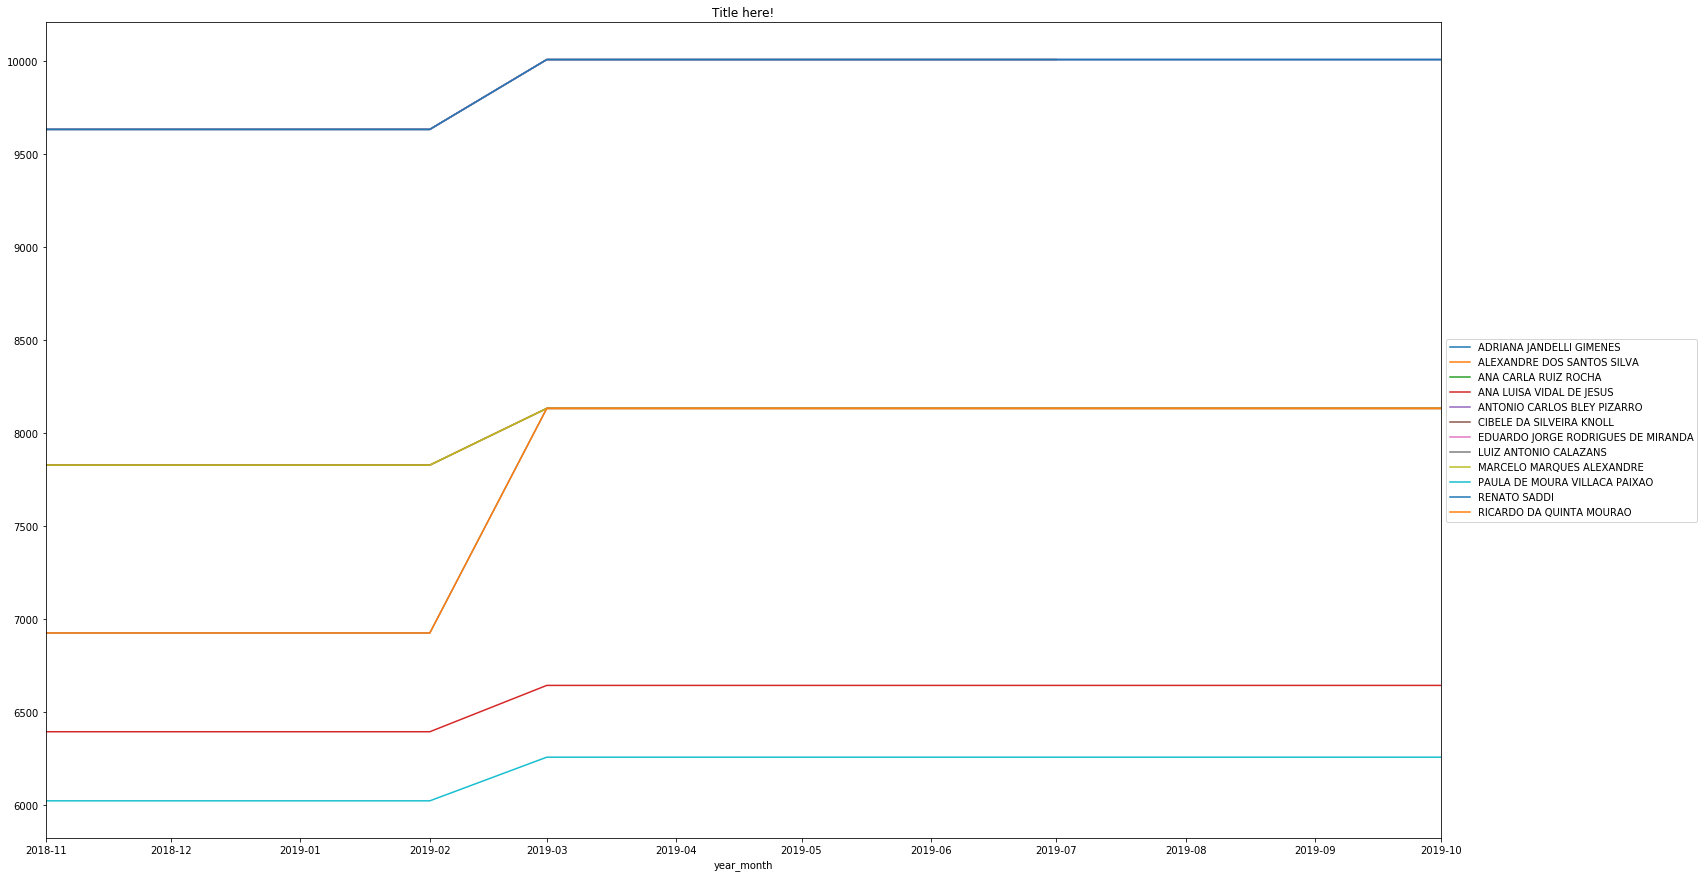

In [97]:

df = grouped_salaries.pivot(index='year_month', columns='Nome do Servidor', values='Salário Base')

f = plt.figure()
plt.title('Title here!', color='black')
#d.plot(kind='bar', ax=f.gca())
df.plot(figsize=(25,15), legend=False,ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

## Professores

In [107]:
grouped_salaries=all_pgtos[(all_pgtos['Nome do Servidor']!='Total')]\
    .groupby(['Nome do Servidor','year_month'],as_index=False).agg({'Total Mês':'sum','Salário Base':'sum'})

In [109]:
grouped_salaries[grouped_salaries['Nome do Servidor']=='DINA ELIZABETH EVANGELISTA SANTOS']\
.head(20).sort_values('year_month')

,Nome do Servidor,year_month,Total Mês,Salário Base
34846,DINA ELIZABETH EVANGELISTA SANTOS,2018-11-01,19043.61,7087.15
34847,DINA ELIZABETH EVANGELISTA SANTOS,2018-12-01,19043.61,7087.15
34848,DINA ELIZABETH EVANGELISTA SANTOS,2019-01-01,19624.65,7087.15
34849,DINA ELIZABETH EVANGELISTA SANTOS,2019-02-01,19336.46,7087.15
34850,DINA ELIZABETH EVANGELISTA SANTOS,2019-03-01,20177.67,7363.55
34851,DINA ELIZABETH EVANGELISTA SANTOS,2019-04-01,20098.69,7363.55
34852,DINA ELIZABETH EVANGELISTA SANTOS,2019-05-01,20098.69,7363.55
34853,DINA ELIZABETH EVANGELISTA SANTOS,2019-06-01,20098.69,7363.55
34854,DINA ELIZABETH EVANGELISTA SANTOS,2019-07-01,20098.69,7363.55
34855,DINA ELIZABETH EVANGELISTA SANTOS,2019-08-01,20098.69,7363.55


## Deviations in salary

In [113]:
all_pgtos[(all_pgtos['Cargo']=='AUXILIAR DE SERV. GERAIS') & (all_pgtos['Nome do Servidor']!='Total')]\
.sort_values('Total Mês',ascending=False)

,Cargo,Nome do Servidor,Salário Bruto,Total Mês,Salário Base,Total Líquido,month,year,year_month
109625,AUXILIAR DE SERV. GERAIS,DANIEL GOUVEIA DIAS,12023.62,11954.98,1351.68,6115.17,8,2019,2019-08-01
13885,AUXILIAR DE SERV. GERAIS,DANIEL GOUVEIA DIAS,11901.80,11833.16,1351.68,5967.37,7,2019,2019-07-01
85800,AUXILIAR DE SERV. GERAIS,DANIEL GOUVEIA DIAS,11467.34,11398.70,1351.68,5703.22,10,2019,2019-10-01
97719,AUXILIAR DE SERV. GERAIS,DANIEL GOUVEIA DIAS,11467.34,11398.70,1351.68,5703.22,9,2019,2019-09-01
121432,AUXILIAR DE SERV. GERAIS,JOSE CARLOS DOS SANTOS,6658.26,6404.00,1351.68,4622.40,3,2019,2019-03-01
...,...,...,...,...,...,...,...,...,...
50231,AUXILIAR DE SERV. GERAIS,CESAR FERNANDES DA SILVA RIBEIRO,0.00,0.00,1300.94,0.00,11,2018,2018-11-01
73863,AUXILIAR DE SERV. GERAIS,EDUARDO ROCHA DE CASTRO,0.00,0.00,1351.68,0.00,5,2019,2019-05-01
133632,AUXILIAR DE SERV. GERAIS,MARIA ANTONIA GONCALVES TOMASELLI,325.24,0.00,1300.94,325.24,2,2019,2019-02-01
110052,AUXILIAR DE SERV. GERAIS,DANIEL BISPO LINS,0.00,0.00,1351.68,0.00,8,2019,2019-08-01


In [114]:
all_pgtos[(all_pgtos['Cargo']=='AUXILIAR DE SERV. GERAIS') & (all_pgtos['Nome do Servidor']!='Total')]\
['Total Mês'].mean()

2692.1107415282395

In [152]:
grouped_salaries_aux_serv=all_pgtos[(all_pgtos['Nome do Servidor']!='Total') & (all_pgtos['Cargo']=='AUXILIAR DE SERV. GERAIS')]\
    .groupby(['Nome do Servidor','year_month'],as_index=False).agg({'Total Mês':'sum','Salário Base':'sum'})

In [153]:
grouped_salaries_aux_serv['diff_media'] = grouped_salaries_aux_serv['Total Mês'] - 2692.11

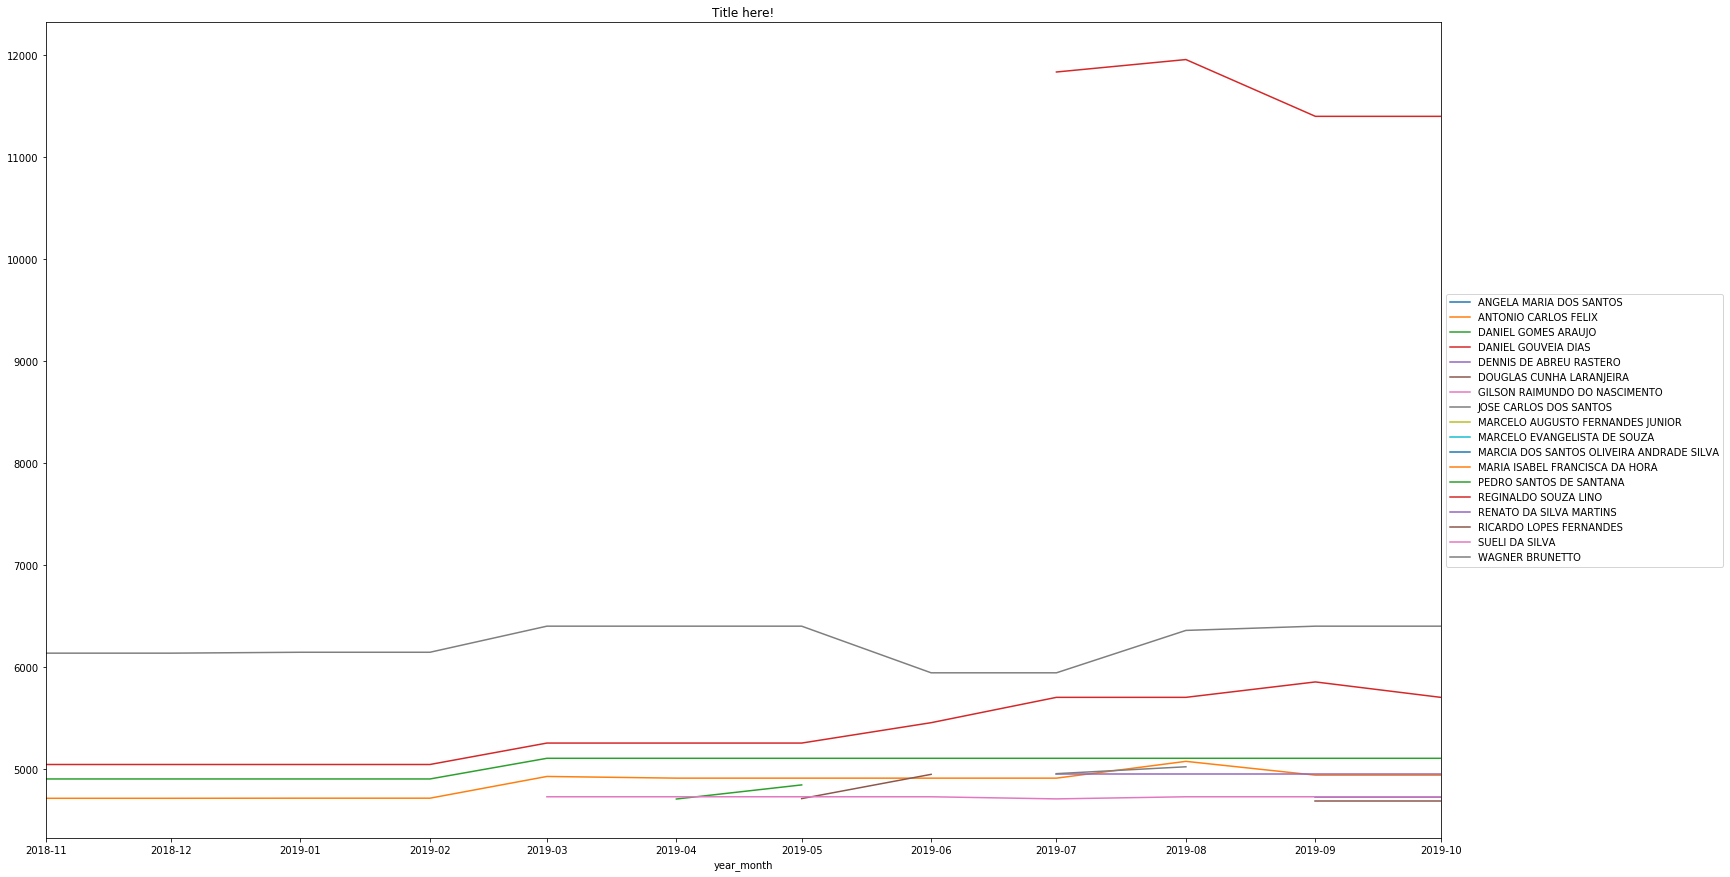

In [166]:
df = grouped_salaries_aux_serv[grouped_salaries_aux_serv['diff_media']>=2000]\
.pivot(index='year_month', columns='Nome do Servidor', values='Total Mês')

f = plt.figure()
plt.title('Title here!', color='black')
#d.plot(kind='bar', ax=f.gca())
df.plot(figsize=(25,15), legend=False,ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [154]:
grouped_salaries_aux_serv['diff_media'].describe()

count    7525.000000
mean        0.000742
std       784.553893
min     -2692.110000
25%      -470.330000
50%       -60.540000
75%       474.570000
max      9262.870000
Name: diff_media, dtype: float64

In [155]:
grouped_salaries_aux_serv[grouped_salaries_aux_serv['Nome do Servidor']=='DANIEL GOUVEIA DIAS'].head(20)

,Nome do Servidor,year_month,Total Mês,Salário Base,diff_media
1420,DANIEL GOUVEIA DIAS,2019-07-01,11833.16,1351.68,9141.05
1421,DANIEL GOUVEIA DIAS,2019-08-01,11954.98,1351.68,9262.87
1422,DANIEL GOUVEIA DIAS,2019-09-01,11398.70,1351.68,8706.59
1423,DANIEL GOUVEIA DIAS,2019-10-01,11398.70,1351.68,8706.59


In [167]:
len(grouped_salaries_aux_serv[abs(grouped_salaries_aux_serv['diff_media'])>=2000]['Nome do Servidor']\
    .unique().tolist())

61